## Лабораторная работа №1 | Вариант 5

Выполнил: Губарев Михаил М8О-311Б-22

### 1. Numpy

In [286]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [287]:
matrix = np.eye(3,3)

print (matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [288]:
rgba_dtype = np.dtype([('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')])


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [289]:
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [290]:
vector = np.random.random(10)
sorted_vector = np.sort(vector)

print(sorted_vector)

[0.00582947 0.0345646  0.16189375 0.19173347 0.23784903 0.29334291
 0.34890483 0.63526725 0.69995454 0.83672389]


5. Создайте read-only массив(неизменяемый)

In [291]:
arr = np.zeros(5)
arr.flags.writeable = False

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [292]:
coords = np.random.random((10, 2))

x, y = coords[:, 0], coords[:, 1]
r = np.sqrt(x**2 + y**2)
ocd = np.arctan2(y, x)

polar_coords = np.column_stack((r, ocd))
print(polar_coords)

[[0.89968811 0.50222764]
 [0.56583535 1.09300341]
 [1.08190484 1.04016894]
 [0.72162026 0.96583537]
 [0.63122709 0.32647507]
 [0.92326409 1.17151722]
 [0.2826864  1.18464974]
 [0.67953327 1.36301501]
 [1.09293791 0.59155593]
 [1.03337571 0.75890407]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [293]:
n = 6 
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xx, yy = np.meshgrid(x, y)


coord_array = np.zeros((n, n), dtype=[('x', float), ('y', float)])
coord_array['x'], coord_array['y'] = xx, yy

print(coord_array)

[[(0. , 0. ) (0.2, 0. ) (0.4, 0. ) (0.6, 0. ) (0.8, 0. ) (1. , 0. )]
 [(0. , 0.2) (0.2, 0.2) (0.4, 0.2) (0.6, 0.2) (0.8, 0.2) (1. , 0.2)]
 [(0. , 0.4) (0.2, 0.4) (0.4, 0.4) (0.6, 0.4) (0.8, 0.4) (1. , 0.4)]
 [(0. , 0.6) (0.2, 0.6) (0.4, 0.6) (0.6, 0.6) (0.8, 0.6) (1. , 0.6)]
 [(0. , 0.8) (0.2, 0.8) (0.4, 0.8) (0.6, 0.8) (0.8, 0.8) (1. , 0.8)]
 [(0. , 1. ) (0.2, 1. ) (0.4, 1. ) (0.6, 1. ) (0.8, 1. ) (1. , 1. )]]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [294]:
n = 5

x = np.random.normal(size=n)
y = np.random.normal(size=n)

cauchy_matrix = 1.0 / (x[:, np.newaxis] - y[np.newaxis, :])

print(cauchy_matrix)

[[ 1.20580272  1.13921645 -0.5625942   1.51147873 -3.85312177]
 [31.80764274 12.51372671 -0.3882946  -7.33781681 -0.94570348]
 [ 0.79041137  0.76124516 -0.74535689  0.91120766  5.67179242]
 [ 1.03427384  0.98489643 -0.60977795  1.25134108 -8.19732965]
 [-1.47756287 -1.59155358 -0.30454441 -1.18411937 -0.5663659 ]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [295]:
arr = np.array([1.3, 2.6, 3.1], dtype=np.float32)

arr = arr.astype(np.int32, copy=False)

#arr.dtype = np.int32 #v2 more like reinterpret_cast

print(arr)

[1 2 3]


10. Как случайно заменить p элементов в 2D массиве?

In [296]:
arr = np.zeros((3, 5))
print(arr)

p = 3 

new_values = np.random.rand(p)

linear_indices = np.random.choice(arr.size, p, replace=False)
rows, cols = np.unravel_index(linear_indices, arr.shape)
arr[rows, cols] = new_values

print()
print(arr)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

[[0.         0.         0.         0.43223928 0.27935951]
 [0.         0.         0.         0.         0.10815789]
 [0.         0.         0.         0.         0.        ]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
df = pd.read_csv('data.csv')

1. Узнайте сколько было на борту человек

In [299]:
num_passengers = df.shape[0]
print(f"cnt: {num_passengers}")

cnt: 891


2. Какой медианный и средний возраста пассажиров

In [300]:
print(f"middle: {df['Age'].mean():.2f}")
print(f"median: {df['Age'].median()}")

middle: 29.70
median: 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [301]:
children = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]

stats_c = children['Survived'].mean() * 100
stats_o = adults['Survived'].mean() * 100

print(f"children: {stats_c:.2f} %")
print(f"adults: {stats_o:.2f} %")

children: 59.04 %
adults: 38.19 %


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [302]:
alive_women = df[df['Sex'] == 'female']['Survived'].mean() * 100

alive_children = (df[df['Age'] < 16])['Survived'].mean() * 100
adult_men = df[(df['Sex'] == 'male') & (df['Age'] >= 16)]
alive_men = adult_men['Survived'].mean() * 100

print(f"Women alive : {alive_women:.2f}%")
print(f"Children alive : {alive_children:.2f}%")
print(f"Men alive: {alive_men:.2f}%")

if alive_women > alive_men and alive_children > alive_men:
    print("\nState is correct")
else:
    print("\nState is a lie")

Women alive : 74.20%
Children alive : 59.04%
Men alive: 17.43%

State is correct


5. Зависит ли выживаемость от класса обслуживания?

In [303]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)

# зависит, буквально убывание

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


6. Посчитайте средний возраст умерших женщин и мужчин

In [304]:
deceased = df[df['Survived'] == 0]

srtd = deceased.groupby('Sex')['Age'].mean()

print(srtd)

Sex
female    25.046875
male      31.618056
Name: Age, dtype: float64


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [305]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = df['FamilySize'] == 0


srtd = df.groupby('IsAlone')['Survived'].mean() * 100


survival_alone = srtd.get(True, 0)
survival_with_family = srtd.get(False, 0)

print(f"Alone :(( : {survival_alone:.2f}%")
print(f"With family (family is the main): {survival_with_family:.2f}%")

    
if abs(survival_alone - survival_with_family) > 5: # 5% as bound
    print("Yes, depends (family is the main)")
else:
    print("No (sad Dominic)")

Alone :(( : 30.35%
With family (family is the main): 50.56%
Yes, depends (family is the main)


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [306]:
srtd = df.groupby('Survived')['Fare'].mean()
print(srtd)

#yes it different

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [307]:
surv = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]

min_surv = surv['Age'].min()
max_surv = surv['Age'].max()

print(f"Min age: {min_surv}")
print(f"Max age: {max_surv}")


Min age: 0.67
Max age: 62.0


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [308]:
age_threshold = 60 # bound of age

young = df[(df['Sex'] == 'male') & (df['Age'] >= 18) & (df['Age'] <= age_threshold)]['Survived'].mean() * 100
old = df[(df['Sex'] == 'male') & (df['Age'] > age_threshold)]['Survived'].mean() * 100

print(f"With age 18-{age_threshold} y.o.: {young:.2f}%")
print(f"With age {age_threshold} y.o.: {old:.2f}%")

print()
if young > old:
    print(f"True")
else:
    print(f"False")

With age 18-60 y.o.: 18.09%
With age 60 y.o.: 10.53%

True


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [309]:
sns.set_theme(style="whitegrid")

1. Постройте гистограмму распределения возростов пассажиров

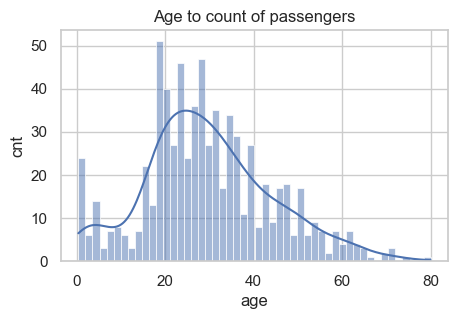

In [310]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='Age', bins=50, kde=True)
plt.title('Age to count of passengers')
plt.xlabel('age')
plt.ylabel('cnt')
plt.show()


2. Постройте гистограммы распределения цен для пассажиров разных классов

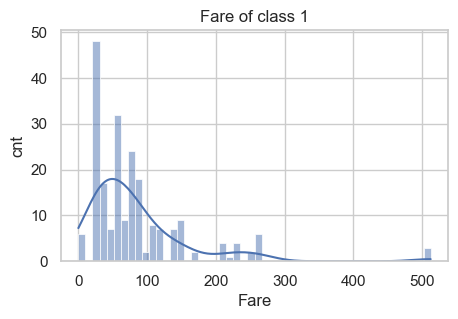

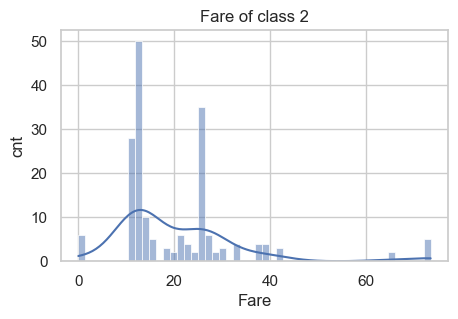

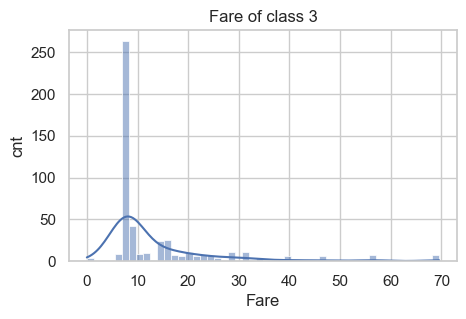

In [311]:
for i in range(1, 4):
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df[df["Pclass"] == i], x='Fare', bins=50, kde=True)
    plt.title('Fare of class {i}'.format(i=i))
    plt.xlabel('Fare')
    plt.ylabel('cnt')
    plt.show()

3. Постройте зависимость цены от возраста пассажира

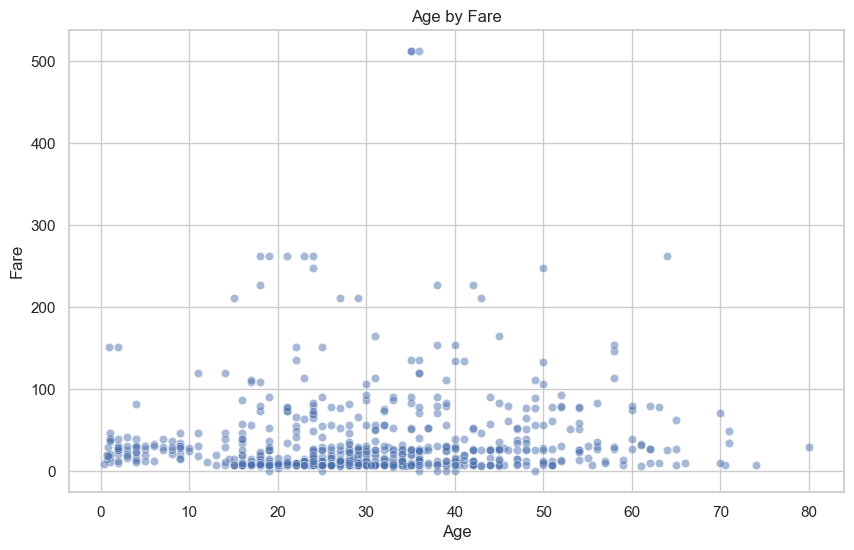

In [312]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', alpha=0.5)
plt.title('Age by Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

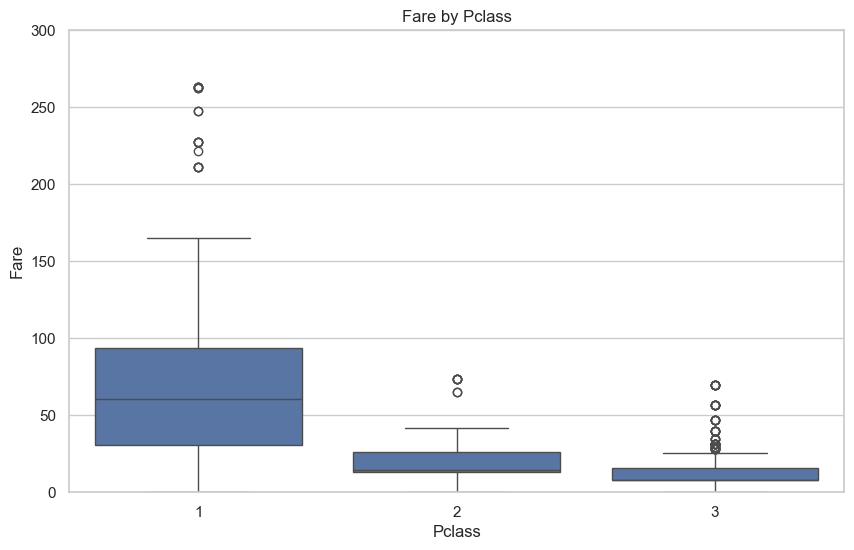

In [313]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.ylim(0, 300)
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

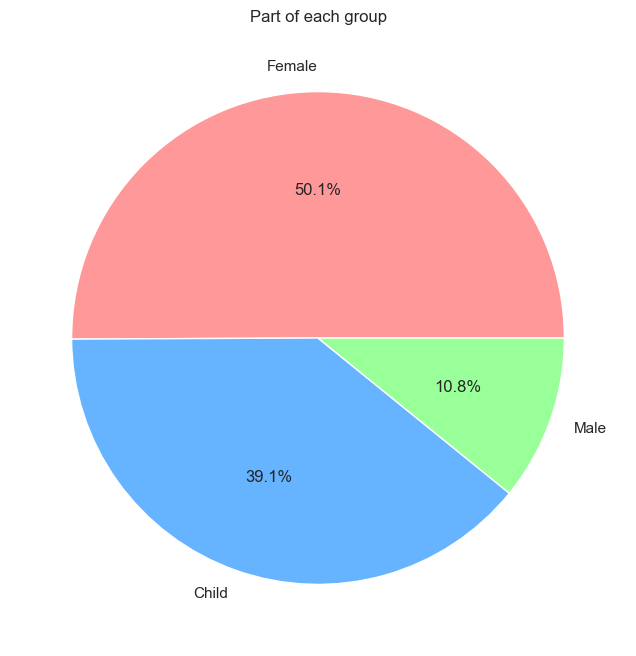

In [314]:
df['Group'] = df.apply(lambda row: 'Child' if row['Age'] < 16 else row['Sex'].title(), axis=1) # maybe this not the best idea
survival = df.groupby('Group')['Survived'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(survival, labels=survival.index,  autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Part of each group')
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

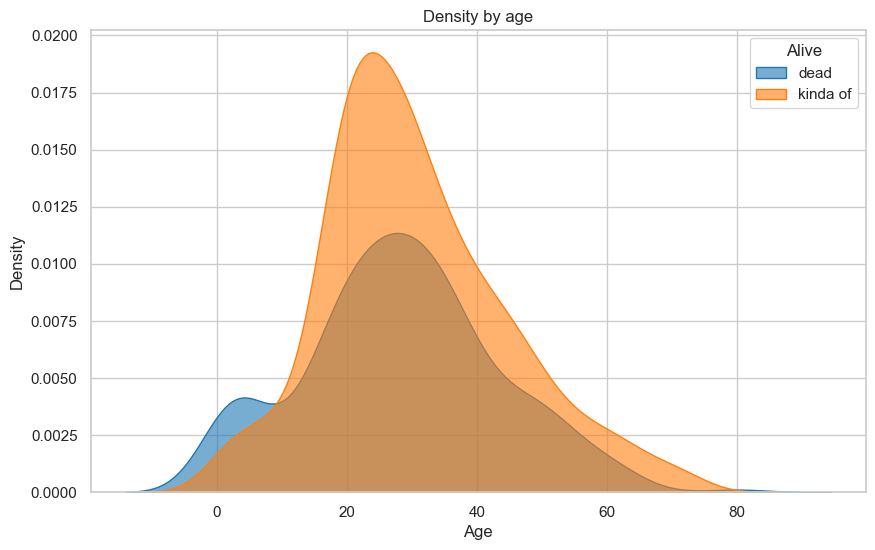

In [315]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True,
            palette=['#ff7f0e', '#1f77b4'], alpha=0.6)
plt.title('Density by age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Alive', labels=['dead', 'kinda of'])
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

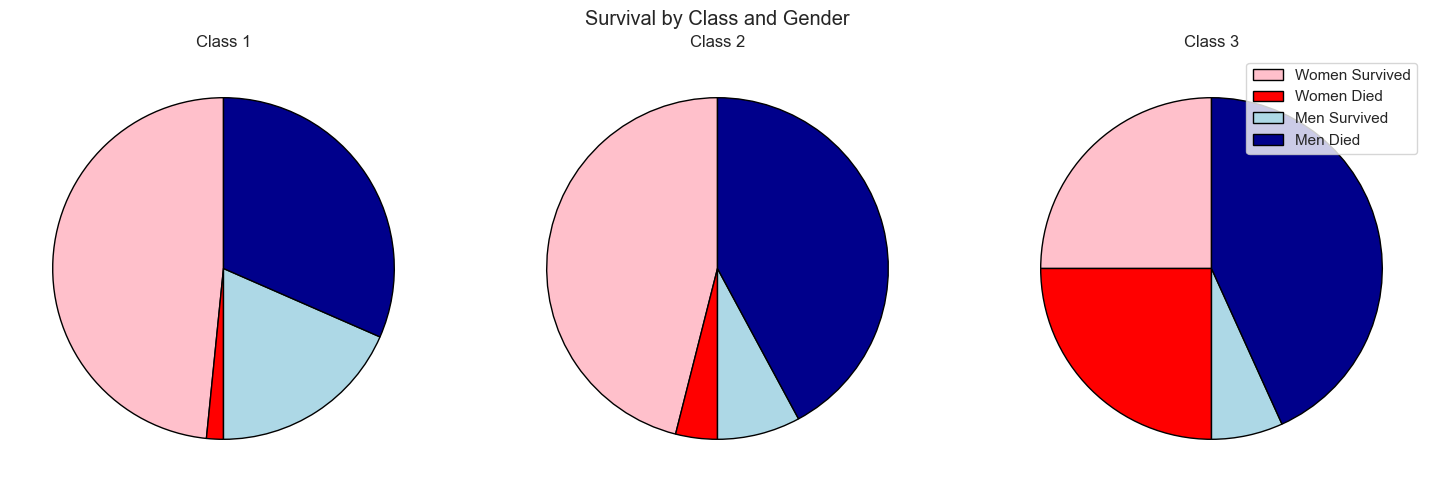

In [316]:
def get_stats(df, pclass):
    class_data = df[df['Pclass'] == pclass]
    women = class_data[class_data['Sex'] == 'female']
    men = class_data[class_data['Sex'] == 'male']

    return {
        'women_survived': women['Survived'].mean()*100,
        'women_died': 100 - women['Survived'].mean()*100,
        'men_survived': men['Survived'].mean()*100,
        'men_died': 100 - men['Survived'].mean()*100
    }

data = {
    1: get_stats(df, 1),
    2: get_stats(df, 2),
    3: get_stats(df, 3)
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Для каждого класса
for i, (cls, values) in enumerate(data.items()):
    sizes = [ values['women_survived'], values['women_died'], values['men_survived'], values['men_died'] ]
    axes[i].pie( sizes,  colors=['pink', 'red', 'lightblue', 'darkblue'], startangle=90,  wedgeprops= {'edgecolor': 'black'} )
    axes[i].set_title(f'Class {cls}')


plt.legend( ['Women Survived', 'Women Died', 'Men Survived', 'Men Died'])
plt.suptitle('Survival by Class and Gender')
plt.tight_layout()
plt.show()